# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [77]:
# student 1: Dor Cohen ID:7556
# student 2:

In [78]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.linear_model import LogisticRegression


## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [79]:
train_file = 'titanic_train.csv'
test_file = 'titanic_test.csv'

# Loading the train and test datasets
train_data = pd.read_csv(train_file)
test_data = pd.read_csv(test_file)

# המצגת 5 שורות ראשונות
train_data_head = train_data.head()
test_data_head = test_data.head()

# Showing info both datasets
train_info = train_data.info()
test_info = test_data.info()

train_data_head, test_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  


(   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  Survived
 0       1    0  54.0      1      0  78.2667         1         1
 1       2    0  45.0      0      0  13.5000         0         1
 2       3    1  20.0      0      0   9.5000         0         0
 3       3    1  36.0      0      0   7.8958         0         0
 4       3    1  22.0      0      0   8.0500         0         0,
    Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
 0       3    1  35.000000      0      0   7.0500         0         0
 1       3    1  30.000000      0      0   7.2500         0         0
 2       3    1  29.699118      0      0  14.5000         0         0
 3       3    0  21.000000      0      0   7.7500         2         0
 4       3    1  32.000000      0      0  56.4958         0         1)

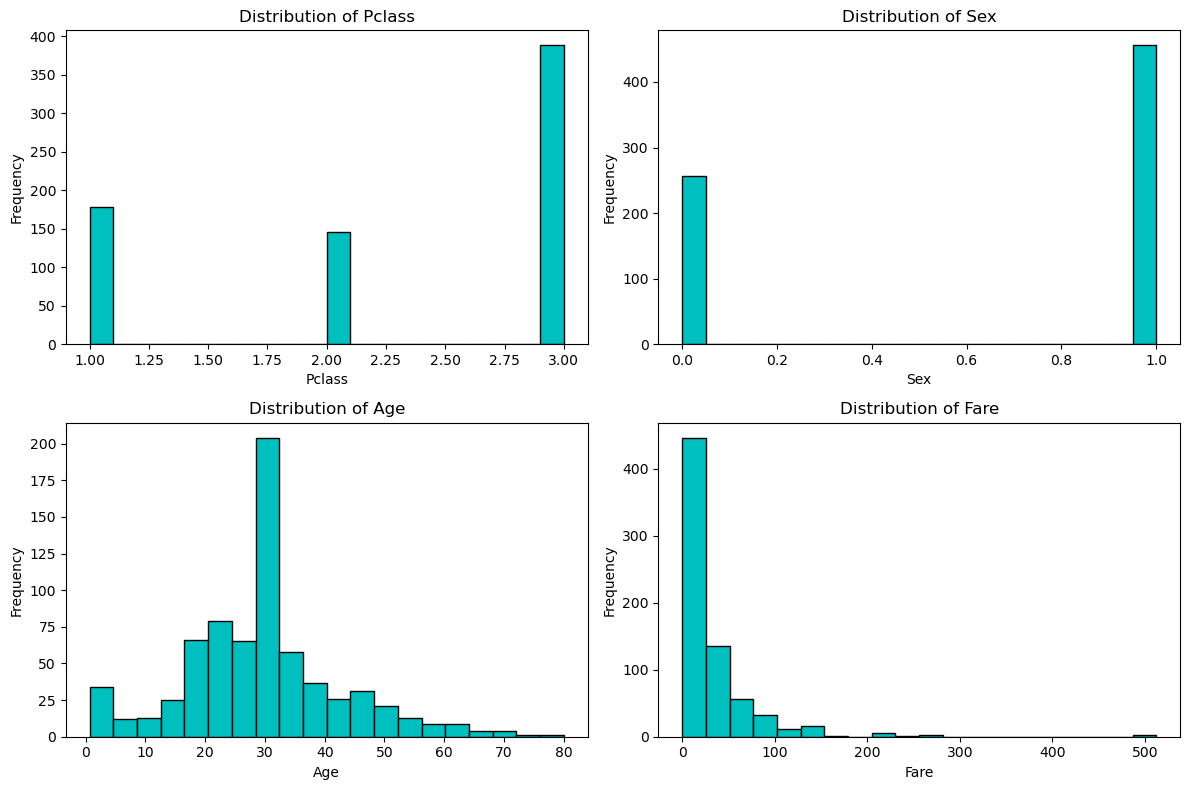

In [80]:
import matplotlib.pyplot as plt

# היסטוגרמה של 4 פיצרים
features = ['Pclass', 'Sex', 'Age', 'Fare']

# Creating a figure with subplots for multiple histograms
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  
axes = axes.flatten()  # Flatten 2D array subplots 

# Loop through each feature to create a histogram
for i, feature in enumerate(features):
    axes[i].hist(train_data[feature], bins=20, color='c', edgecolor='black') 
    axes[i].set_title(f'Distribution of {feature}')  # Adding title for each subplot
    axes[i].set_xlabel(feature)  # X-axis label feature name
    axes[i].set_ylabel('Frequency')  # Y-axis label frequency/count

plt.tight_layout()

plt.show()

In [81]:
# יצירת סטטיסטיקות
train_statistics = train_data.describe()

# בדיקה של ערכים חסרים
missing_values = train_data.isnull().sum()

print("Descriptive Statistics:\n", train_statistics)
print("\nMissing Values:\n", missing_values)

Descriptive Statistics:
            Pclass         Sex         Age       SibSp       Parch        Fare  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     2.294944    0.640449   29.531213    0.528090    0.384831   32.379429   
std      0.841990    0.480206   13.188028    1.055052    0.803085   49.836074   
min      1.000000    0.000000    0.670000    0.000000    0.000000    0.000000   
25%      1.750000    0.000000   22.000000    0.000000    0.000000    7.925000   
50%      3.000000    1.000000   29.699118    0.000000    0.000000   14.500000   
75%      3.000000    1.000000   35.000000    1.000000    0.000000   31.275000   
max      3.000000    1.000000   80.000000    8.000000    6.000000  512.329200   

         Embarked    Survived  
count  712.000000  712.000000  
mean     0.372191    0.394663  
std      0.649970    0.489122  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    0.000000  
75%      1.000000    

## Part 3 - Experiments
You could add as many code cells as needed

In [82]:
# Preprocessing - Handle  features and missing values
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

# הגדרה של XY
X = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
y = train_data['Survived']

# Handle missing values 
X = X.copy()  
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Fare'].fillna(X['Fare'].median(), inplace=True)

# Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Defining models for experimentation
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier()
}

# Hyperparameter 
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
}

# Define scoring metric F1 score
scorer = make_scorer(f1_score, average='macro')

results = {}

for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring=scorer)
    grid_search.fit(X_scaled, y)
    
    # Store best model and score
    results[model_name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }

results_df = pd.DataFrame(results).T
print(results_df)

                    best_score                            best_params
Logistic Regression   0.785028                               {'C': 1}
Random Forest         0.805588  {'max_depth': 10, 'n_estimators': 50}


In [83]:
# Preprocessing - Handle categorical features
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

# ערכים חסרים
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

#  BASELINE (Without Feature Engineering) 
X_baseline = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
y = train_data['Survived']

# Scaling the features
scaler = StandardScaler()
X_baseline_scaled = scaler.fit_transform(X_baseline)



#  WITH FEATURE ENGINEERING 
# Create new features
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch']
train_data['IsAlone'] = (train_data['FamilySize'] == 0).astype(int)
train_data['AgeBin'] = pd.cut(train_data['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior'])

# Define X with engineered features
X_engineered = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'AgeBin']]

# One-hot encoding for categorical variables (AgeBin)
X_engineered = pd.get_dummies(X_engineered, drop_first=True)

# Scaling the features
X_engineered_scaled = scaler.fit_transform(X_engineered)

# --- MODEL SETUP ---
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Random Forest': RandomForestClassifier()
}

# Hyperparameter grids for each model
param_grids = {
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10]},
    'Random Forest': {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20, 30]}
}

# Define scoring metric F1 score
scorer = make_scorer(f1_score, average='macro')

results_baseline = {}
results_engineered = {}

# --- Grid Search with 5-fold cross-validation for each model ---
for model_name, model in models.items():
    # Baseline
    grid_search_baseline = GridSearchCV(model, param_grids[model_name], cv=5, scoring=scorer)
    grid_search_baseline.fit(X_baseline_scaled, y)
    
    # Store best model and score for baseline
    results_baseline[model_name] = {
        'best_score': grid_search_baseline.best_score_,
        'best_params': grid_search_baseline.best_params_
    }
    
    # With Feature Engineering
    grid_search_engineered = GridSearchCV(model, param_grids[model_name], cv=5, scoring=scorer)
    grid_search_engineered.fit(X_engineered_scaled, y)
    
    # Store best model and score for engineered features
    results_engineered[model_name] = {
        'best_score': grid_search_engineered.best_score_,
        'best_params': grid_search_engineered.best_params_
    }

results_baseline_df = pd.DataFrame(results_baseline).T
results_engineered_df = pd.DataFrame(results_engineered).T

print("Results without Feature Engineering:")
print(results_baseline_df)

print("\nResults with Feature Engineering:")
print(results_engineered_df)

Results without Feature Engineering:
                    best_score                             best_params
Logistic Regression   0.785028                                {'C': 1}
Random Forest         0.817705  {'max_depth': 10, 'n_estimators': 100}

Results with Feature Engineering:
                    best_score                            best_params
Logistic Regression   0.796346                               {'C': 1}
Random Forest         0.808627  {'max_depth': 10, 'n_estimators': 50}


In [84]:
# Preprocessing - Handle categorical features
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# הגדרה XY
X = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
y = train_data['Survived']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- MODEL SETUP ---
models = {
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Hyperparameter grids for each model
param_grids = {
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],  # Different values for k
        'metric': ['euclidean', 'manhattan']  # Distance metrics
    },
    'Random Forest': {
        'n_estimators': [50, 100, 150],  # Number of trees
        'max_depth': [None, 10, 20]  # Depth of trees
    }
}

# Define scoring metric F1 score
scorer = make_scorer(f1_score, average='macro')

results = {}

# --- Grid Search with 5-fold cross-validation for each model ---
for model_name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring=scorer)
    grid_search.fit(X_scaled, y)
    
    # Store best model and score
    results[model_name] = {
        'best_score': grid_search.best_score_,
        'best_params': grid_search.best_params_
    }
results_df = pd.DataFrame(results).T
print(results_df)

              best_score                                best_params
KNN             0.786073  {'metric': 'manhattan', 'n_neighbors': 9}
Random Forest   0.814713     {'max_depth': 10, 'n_estimators': 150}


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [85]:
# Preprocessing - Handle categorical features
train_data['Sex'] = LabelEncoder().fit_transform(train_data['Sex'])

# Handle missing values
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# בגדרה XY
X = train_data[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
y = train_data['Survived']

# Scaling 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Training the best model with the chosen hyperparameters ---
best_model = RandomForestClassifier(n_estimators=100, max_depth=10)

# Train the model on the entire training dataset
best_model.fit(X_scaled, y)

RandomForestClassifier(max_depth=10)

## Part 5 - Apply on test and show model performance estimation

In [86]:
test_data = pd.read_csv('titanic_test.csv')

# Apply the same preprocessing steps to the test set
test_data['Sex'] = LabelEncoder().fit_transform(test_data['Sex'])

# Handle missing values in the test set
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

# Define X_test 
X_test = test_data[['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]

# Scaling 
X_test_scaled = scaler.transform(X_test)

# Train the best model with the chosen hyperparameters on the entire train set
best_model = RandomForestClassifier(n_estimators=100, max_depth=10)
best_model.fit(X_scaled, y)

y_pred = best_model.predict(X_test_scaled)

print("First 5 predictions on the test set:")
print(y_pred[:5])

# Evaluation
# Cross-validation F1 score can be used as a proxy for model quality
cv_scores = cross_val_score(best_model, X_scaled, y, cv=5, scoring='f1_macro')
print(f"Cross-Validation F1 Macro Score: {cv_scores.mean():.4f}")

print(f"Individual F1 Scores for each fold: {cv_scores}")

print(test_data.head())

First 5 predictions on the test set:
[0 0 0 1 1]
Cross-Validation F1 Macro Score: 0.8164
Individual F1 Scores for each fold: [0.78179426 0.84540541 0.82194357 0.82167622 0.81111998]
   Pclass  Sex        Age  SibSp  Parch     Fare  Embarked  Survived
0       3    1  35.000000      0      0   7.0500         0         0
1       3    1  30.000000      0      0   7.2500         0         0
2       3    1  29.699118      0      0  14.5000         0         0
3       3    0  21.000000      0      0   7.7500         2         0
4       3    1  32.000000      0      0  56.4958         0         1
